Problem Statement No. 08

1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset. 
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset 
- Use :Social_Network_Ads.csv

In [1]:
import pandas as pd

In [29]:
df = pd.read_csv("Datasets/Social_Network_Ads.csv")

In [30]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [31]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [32]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [33]:
# male = 1 ; female = 0
df["IsMale"] = df.Gender
df["IsMale"] = df.Gender.apply(lambda x: 1 if x=="Male" else 0)

In [39]:
df.drop(["Gender"], axis=1, inplace=True)

In [40]:
df

,User ID,Age,EstimatedSalary,Purchased,IsMale
0,15624510,19.0,19000.0,0,1
1,15810944,35.0,20000.0,0,1
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,0,1
...,...,...,...,...,...
395,15691863,46.0,41000.0,1,0
396,15706071,51.0,23000.0,1,1
397,15654296,50.0,20000.0,1,0
398,15755018,36.0,33000.0,0,1


In [42]:
# Selecting features and target variable
X = df[['Age', 'EstimatedSalary','IsMale']]
y = df['Purchased']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [49]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(Xtrain, ytrain)

LogisticRegression(random_state=0)

In [55]:
# Predicting the Test set results
y_pred = classifier.predict(Xtest)

In [56]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [60]:
# Creating the Confusion Matrix
cm = confusion_matrix(ytest, y_pred)

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

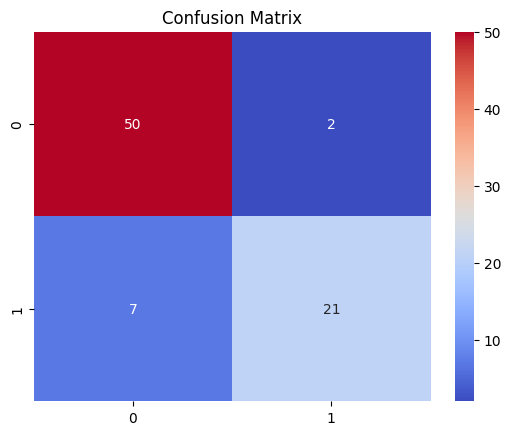

In [68]:
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()

In [69]:
# Computing other metrics
accuracy = accuracy_score(ytest, y_pred)
error_rate = 1 - accuracy
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

# Displaying the results
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[50  2]
 [ 7 21]]

Accuracy: 0.8875
Error Rate: 0.11250000000000004
Precision: 0.9130434782608695
Recall: 0.75
F1 Score: 0.8235294117647057
